<a href="https://colab.research.google.com/github/Chandu106/Regression_Insurance_project02/blob/main/updated_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # import the required libraries
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the insuranse dataset 

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
# checkout the insurance dataset 

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# in some of the columns there are alphabetical categories but machine learning model can work in numericals only so now we have to convert non numerical columns to numerical by one hot encoding

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
# creating X and y

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
# view the features(X)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
# view labels
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
# now we splited up what are the dependent and independent variables in our machine learning model now the next main is to allocate some data to training and some to the testing
#the general split up we follow is 80% is for training and 20% is for testing

#creating training and test sets(using train_test_split which is the function available)

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)
len(X), len(X_train) , len(X_test)
len(y), len(y_train) , len(y_test)

(1338, 1070, 268)

In [10]:
# now we have to build and fit the model as all the trainind and testing data is ready

#set random seed

tf.random.set_seed(42)

#create a new model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compiling the model 

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
#fit the model 

insurance_model.fit(X_train , y_train , epochs = 100)


Epoch 1/100
34/34 [==============================] - 8s 11ms/step - loss: 8828.0742 - mae: 8828.0742
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 7866.4756 - mae: 7866.4756
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 7552.0327 - mae: 7552.0327
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7785.4380 - mae: 7785.4380
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7673.1855 - mae: 7673.1855
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7562.6606 - mae: 7562.6606
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7577.8013 - mae: 7577.8013
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7666.5444 - mae: 7666.5444
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7577.9600 - mae: 7577.9600
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7733.4727 - mae: 7733.472

In [11]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [12]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
insurance_model_2.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5058.7358 - mae: 5058.7358


[5058.73583984375, 5058.73583984375]

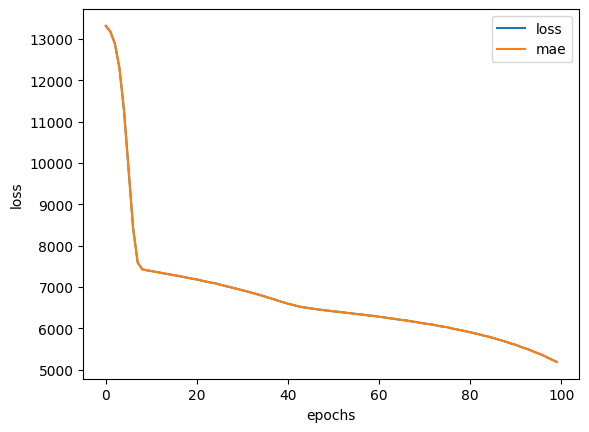

In [14]:
#plot the loss curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [15]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [16]:
insurance_model_3.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3486.8147 - mae: 3486.8147


[3486.814697265625, 3486.814697265625]

In [17]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_4.fit(X_train, y_train, epochs=500, verbose=0)

In [18]:
insurance_model_4.evaluate(X_test , y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3169.7410 - mae: 3169.7410


[3169.740966796875, 3169.740966796875]

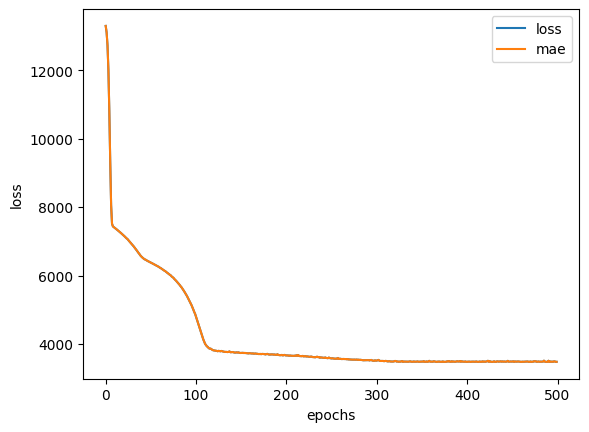

In [19]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [20]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000), # 100 units
  tf.keras.layers.Dense(100), # 10 units
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
insurance_model_5.fit(X_train, y_train, epochs=100, verbose=0)

In [21]:
insurance_model_5.evaluate(X_test , y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3185.7622 - mae: 3185.7622


[3185.76220703125, 3185.76220703125]

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#create column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
ct.fit(X_train)

#transform training and test data with normalization and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [25]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [26]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [27]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [28]:
insurance_model_3.evaluate(X_test_normal , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.0010 - mae: 3167.0010


[3167.0009765625, 3167.0009765625]